## Momentum-Based GD

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
a, b = -1, 2
y = a*X + b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

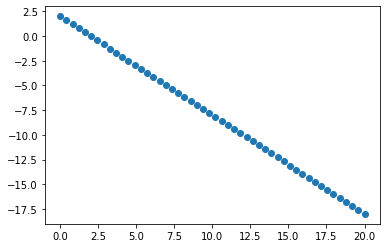

In [6]:
plt.scatter(X, y)

In [7]:
def plots(iterations, costs, thetas_0, thetas_1):
    iterations = iterations + 1
    plt.plot(np.linspace(1,iterations,num=iterations), costs)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    plt.plot(thetas_0, costs)
    plt.xlabel('theta 0')
    plt.ylabel('Loss')
    plt.show()
    plt.plot(thetas_1, costs)
    plt.xlabel('theta 1')
    plt.ylabel('Loss')
    plt.show()

In [8]:
def plot_regression_lines(thetas_0, thetas_1, iterations):
    for i in range(1,iterations, 10):
        hypothesis = thetas_0[i] + (thetas_1[i] * X)
        plt.scatter(X, y)
        plt.plot(X, hypothesis)

In [9]:
def plot_best_line(thetas_0, thetas_1):
    hypothesis = thetas_0[-1] + (thetas_1[-1] * X)
    plt.scatter(X, y)
    plt.plot(X, hypothesis, 'r')

In [10]:
def calc_r2(thetas_0, thetas_1):
    hypothesis = thetas_0[-1] + (thetas_1[-1] * X)
    from sklearn.metrics import r2_score
    return r2_score(y, hypothesis)

In [11]:
def gradient_descent(X, y, alpha, iterations):
    theta_0, theta_1 = 0, 0
    m = X.shape[0]
    costs, thetas_0, thetas_1 = [], [], []
    thetas_0.append(theta_0)
    thetas_1.append(theta_1)
    for i in range(iterations):
        hypothesis = theta_0 + (theta_1 * X)
        error = hypothesis - y
        
        cost = (1/(2*m)) * ((np.linalg.norm(error))**2)
        costs.append(cost)
        
        gradient = [(1/m) * np.sum(error), (1/m) * error@X]

        theta_0 = theta_0 - (alpha * gradient[0])
        theta_1 = theta_1 - (alpha * gradient[1])
        
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
    cost = (1/(2*m)) * ((np.linalg.norm(hypothesis - y))**2)
    costs.append(cost)
    return costs, thetas_0, thetas_1

R2 score:  0.9755443780136139


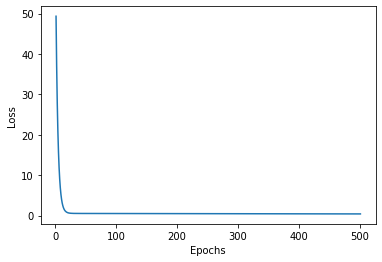

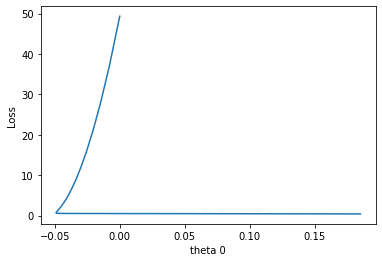

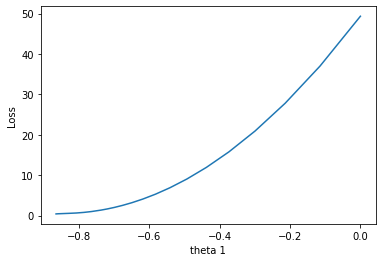

In [12]:
alpha = 0.001
iterations=500
costs, thetas_0, thetas_1 = gradient_descent(X, y, alpha, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)

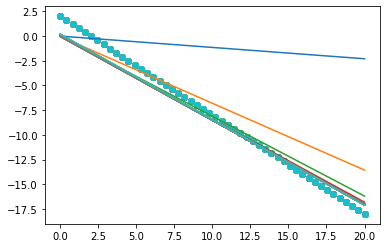

In [13]:
plot_regression_lines(thetas_0, thetas_1, iterations)

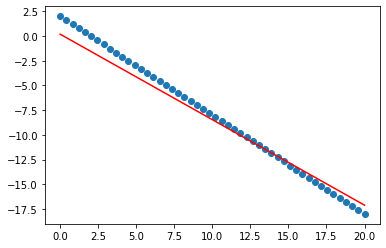

In [15]:
plot_best_line(thetas_0, thetas_1)

In [16]:
def momentum_gd(X, y, alpha, gamma, iterations):
    theta_0, theta_1 = 2.5, 0
    v_t_0, v_t_1 = 0, 0
    m = X.shape[0]
    costs, thetas_0, thetas_1 = [], [], []
    thetas_0.append(theta_0)
    thetas_1.append(theta_1)
    for i in range(iterations):
        hypothesis = theta_0 + (theta_1 * X)
        error = hypothesis - y
        
        cost = (1/(2*m)) * ((np.linalg.norm(error))**2)
        costs.append(cost)
        
        gradient = [(1/m)*np.sum(error), (1/m)*error@X]

        v_t_0 = (gamma * v_t_0) + (alpha * gradient[0])
        v_t_1 = (gamma * v_t_1) + (alpha * gradient[1])
        
        theta_0 = theta_0 - v_t_0
        theta_1 = theta_1 - v_t_1
        
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
    cost = (1/(2*m)) * ((np.linalg.norm(error))**2)
    costs.append(cost)
    return costs, thetas_0, thetas_1

### Best hyperparametres values after trying:
### alpha = 0.01 gamma = 0.999

R2 score:  0.999999591895788


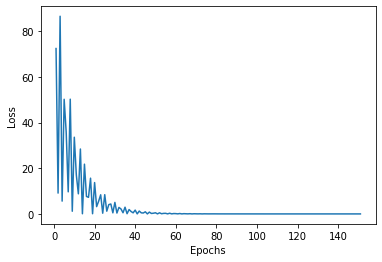

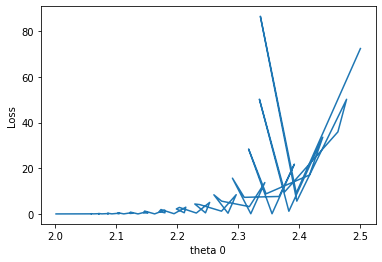

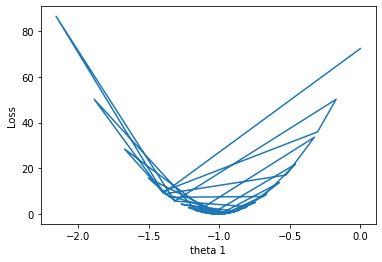

In [20]:
alpha = 0.01
gamma = 0.9
iterations = 150
costs, thetas_0, thetas_1 = momentum_gd(X, y, alpha, gamma, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)


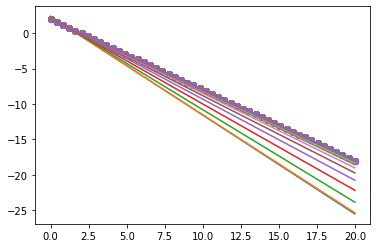

In [21]:
plot_regression_lines(thetas_0, thetas_1, iterations)

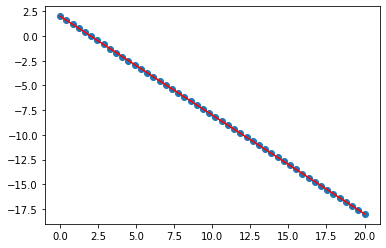

In [22]:
plot_best_line(thetas_0, thetas_1)

R2 score:  0.9989707393299048


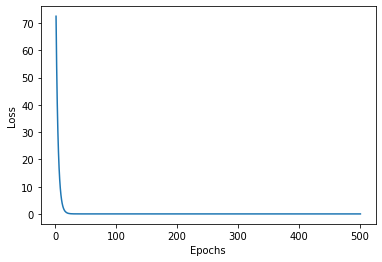

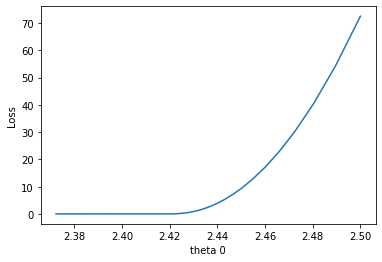

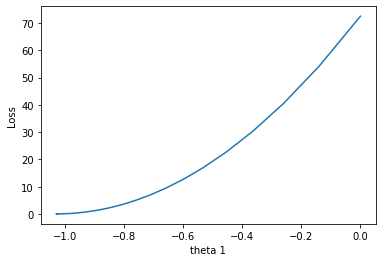

In [23]:
alpha = 0.001
gamma = 0.001
iterations=500
costs, thetas_0, thetas_1 = momentum_gd(X, y, alpha, gamma, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)

R2 score:  0.9987350329428091


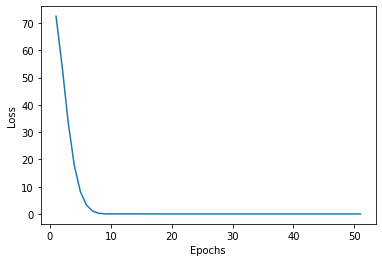

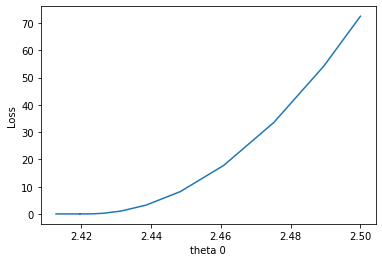

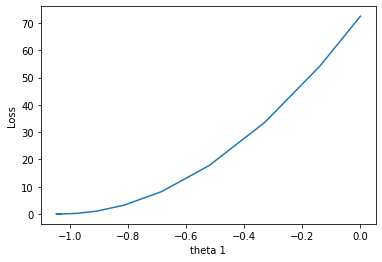

In [24]:
alpha = 0.001
gamma = 0.5
iterations=50
costs, thetas_0, thetas_1 = momentum_gd(X, y, alpha, gamma, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

R2 score:  0.9989731322136514


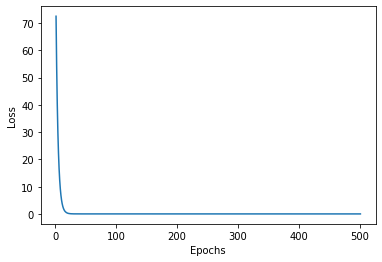

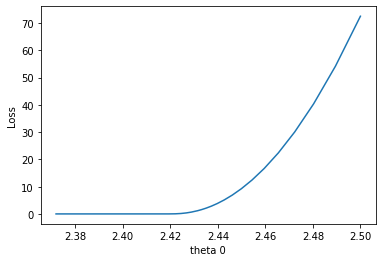

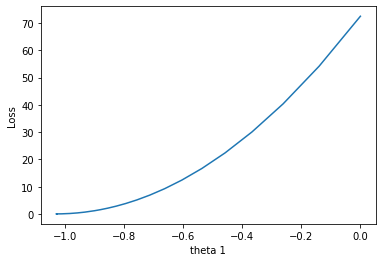

In [25]:
alpha = 0.001
gamma = 0.01
iterations=500
costs, thetas_0, thetas_1 = momentum_gd(X, y, alpha, gamma, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)

R2 score:  0.9998567683918526


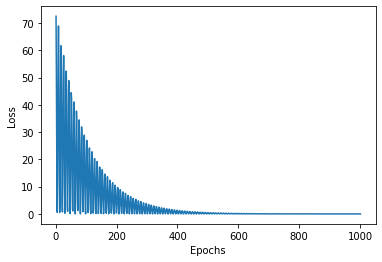

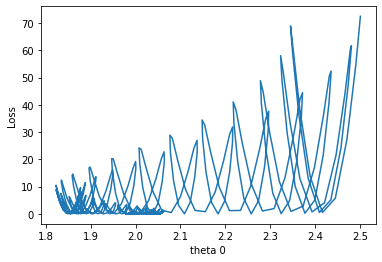

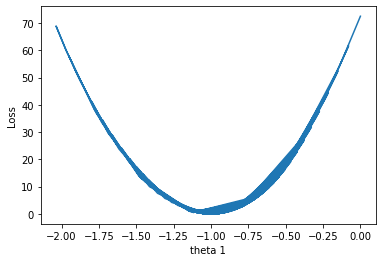

In [26]:
alpha = 0.001
gamma = 0.99
iterations=1000
costs, thetas_0, thetas_1 = momentum_gd(X, y, alpha, gamma, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)

R2 score:  -0.44764265271333725


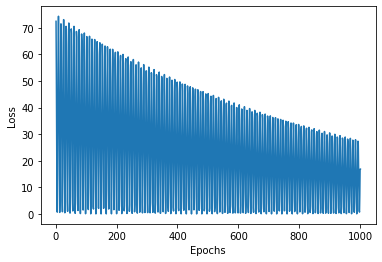

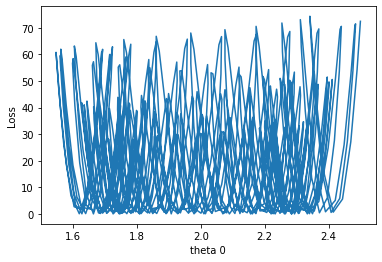

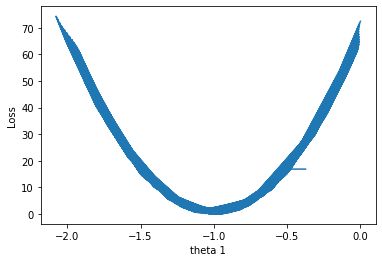

In [27]:
alpha = 0.001
gamma = 0.999
iterations=1000
costs, thetas_0, thetas_1 = momentum_gd(X, y, alpha, gamma, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)

R2 score:  -2.3582594551689735


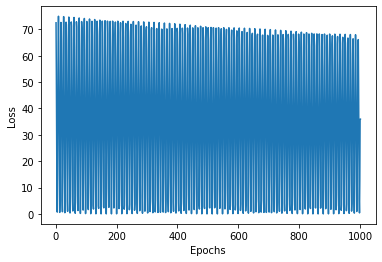

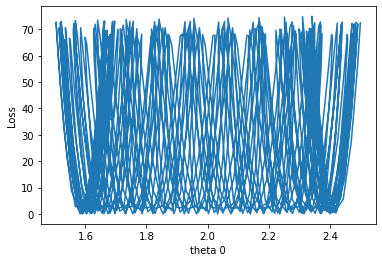

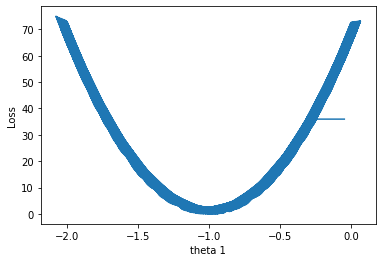

In [28]:
alpha = 0.001
gamma = 0.9999
iterations=1000
costs, thetas_0, thetas_1 = momentum_gd(X, y, alpha, gamma, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)

### Update your Batch GD for one variable  implementation to be NAG and check your results


In [29]:
def nag(X, y, alpha, gamma, iterations):
    theta_0, theta_1 = 0, 0
    v_t_0, v_t_1 = 0, 0
    m = X.shape[0]
    costs, thetas_0, thetas_1 = [], [], []
    thetas_0.append(theta_0)
    thetas_1.append(theta_1)
    for i in range(iterations):
        # Calculate loss at current values of theta0, theta1
        hypothesis = theta_0 + (theta_1 * X)
        error = hypothesis - y
        cost = (1/(2*m)) * ((np.linalg.norm(error))**2)
        costs.append(cost)
        
        # Calculate theta temp with previous momentum
        theta_temp_0 = theta_0 - gamma * v_t_0
        theta_temp_1 = theta_0 - gamma * v_t_1
        
        # Calculate gradient at theta temp
        hypothesis = theta_temp_0 + (theta_temp_1 * X)
        error = hypothesis - y
        gradient = [(1/m)*np.sum(error), (1/m)*error@X]

        # Update theta0, theta1 using gradient at theta temp
        theta_0 = theta_temp_0 - (alpha * gradient[0])
        theta_1 = theta_temp_1 - (alpha * gradient[1])
        
        # Calculate velocity and momentum for next step
        v_t_0 = (gamma * v_t_0) + (alpha * gradient[0])
        v_t_1 = (gamma * v_t_1) + (alpha * gradient[1])
        
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        
    cost = (1/(2*m)) * ((np.linalg.norm(error))**2)
    costs.append(cost)
    return costs, thetas_0, thetas_1

### Best hyperparametres values after trying:
### alpha = 0.01 gamma = 0.9999

R2 score:  0.9999994252306807


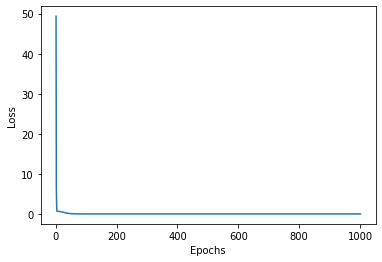

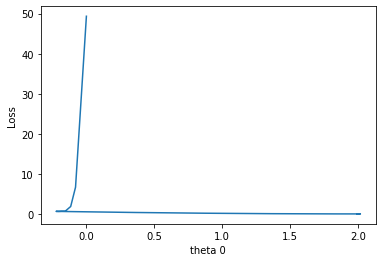

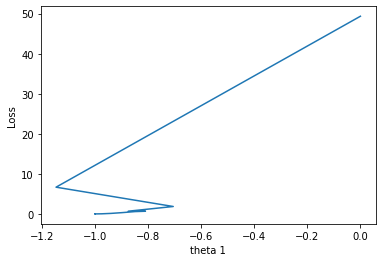

In [30]:
alpha = 0.01
gamma = 0.9999
iterations = 1000
costs, thetas_0, thetas_1 = nag(X, y, alpha, gamma, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)

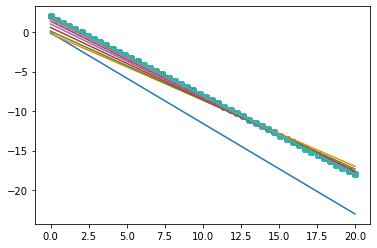

In [31]:
plot_regression_lines(thetas_0, thetas_1, iterations)

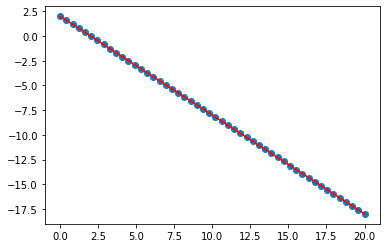

In [32]:
plot_best_line(thetas_0, thetas_1)

R2 score:  0.9589409411105784


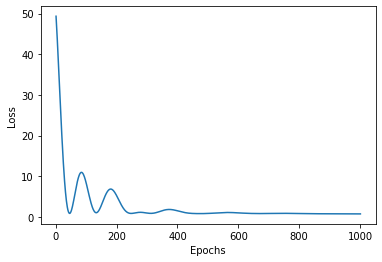

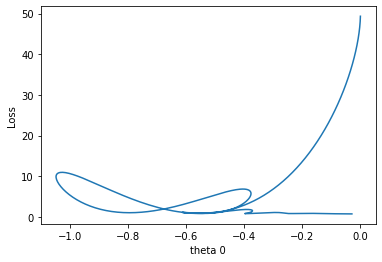

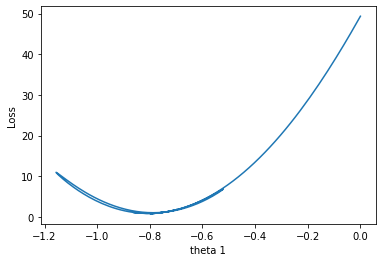

In [33]:
alpha = 0.0001
gamma = 0.9999
iterations = 1000
costs, thetas_0, thetas_1 = nag(X, y, alpha, gamma, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)

R2 score:  0.9996992606833001


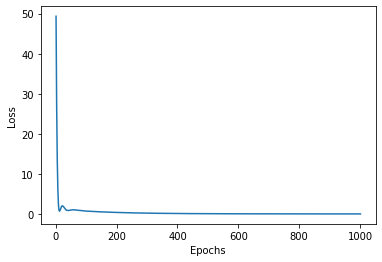

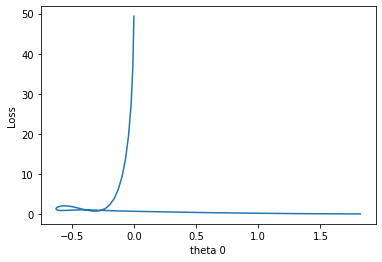

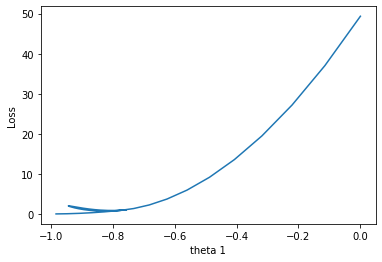

In [34]:
alpha = 0.001
gamma = 0.9999
iterations = 1000
costs, thetas_0, thetas_1 = nag(X, y, alpha, gamma, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)

R2 score:  0.9380769330008771


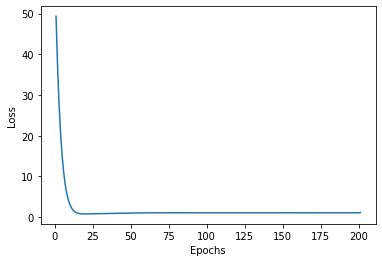

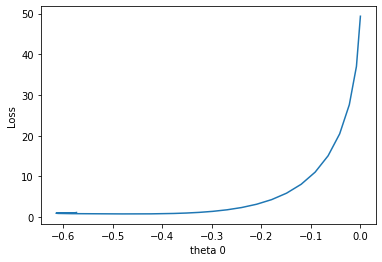

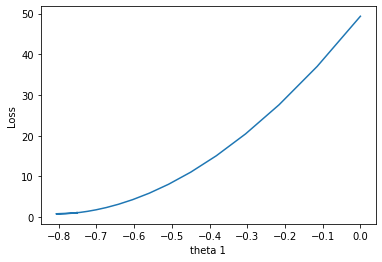

In [35]:
alpha = 0.001
gamma = 0.95
iterations = 200
costs, thetas_0, thetas_1 = nag(X, y, alpha, gamma, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)

R2 score:  0.9650986501386615


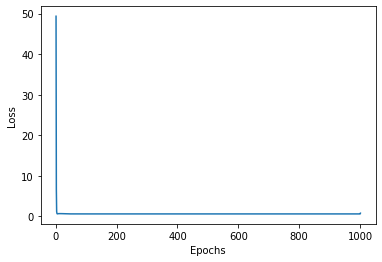

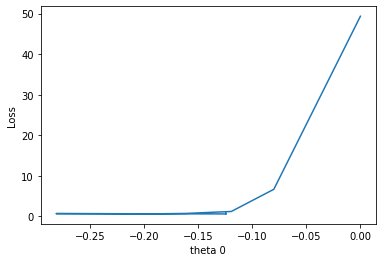

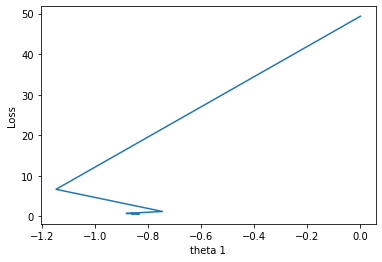

In [36]:
alpha = 0.01
gamma = 0.9
iterations = 1000
costs, thetas_0, thetas_1 = nag(X, y, alpha, gamma, iterations)
print('R2 score: ', calc_r2(thetas_0, thetas_1))
plots(iterations, costs, thetas_0, thetas_1)